In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TRAINING CONTENT')
os.getcwd()

'C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\TRAINING CONTENT'

# Feature Engineering: Feature Creation

### Read in text

In [2]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [3]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [4]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [5]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

# Feature Engineering: Feature Creation

### Read in text

In [6]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [7]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [8]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created features

In [9]:
from matplotlib import pyplot
import numpy as np
#%matplotlib inline

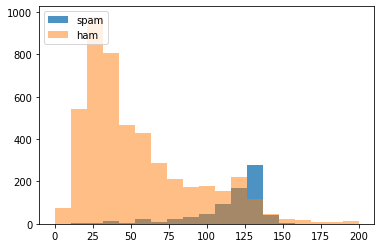

In [10]:
bins = np.linspace(0, 200, 20)

pyplot.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.8, label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'], bins,  alpha=0.5, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


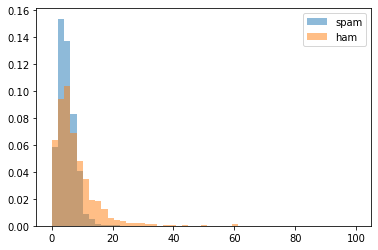

In [11]:
bins = np.linspace(0, 100)

pyplot.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

# Feature Engineering: Transformations

### Read in text

In [12]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create the two new features

In [13]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Plot the two new features

In [14]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

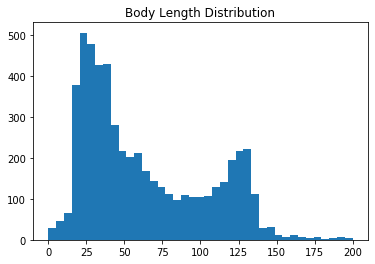

In [15]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data['body_len'], bins)
pyplot.title("Body Length Distribution")
pyplot.show()

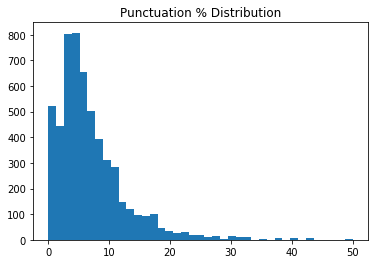

In [16]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data['punct%'], bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

### Transform the punctuation % feature

### Box-Cox Power Transformation

**Base Form**: $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |


**Process**
1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution